## Importing libraries

In [71]:
import numpy as np   # linear algebra
import pandas as pd  # data processing

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
#upload the data
df = pd.read_csv('https://raw.githubusercontent.com/HammouHanini/lv7/main/Crop_recommendation.csv')

In [73]:
#display the first five rows of the train dataset.
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [74]:
# the shape of the dataset

print("Shape of the Dataset:", df.shape)

Shape of the Dataset: (2200, 8)


In [75]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [76]:
 # Essayeons de voir le pourcentage des valeurs manquantes, valeurs uniques, ainsi que le type de chaque feature(variable)
from tabulate import tabulate
stats = []
for col in df.columns:
    stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].dtype))
    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', '% MissingValues', 'type'])
    df_ = stats_df.sort_values('% MissingValues', ascending=False)
print(tabulate(df_, headers = 'keys', tablefmt = 'psql'))

+----+-------------+-----------------+-------------------+---------+
|    | Feature     |   Unique_values |   % MissingValues | type    |
|----+-------------+-----------------+-------------------+---------|
|  0 | N           |             137 |                 0 | int64   |
|  1 | P           |             117 |                 0 | int64   |
|  2 | K           |              73 |                 0 | int64   |
|  3 | temperature |            2200 |                 0 | float64 |
|  4 | humidity    |            2200 |                 0 | float64 |
|  5 | ph          |            2200 |                 0 | float64 |
|  6 | rainfall    |            2200 |                 0 | float64 |
|  7 | label       |              22 |                 0 | object  |
+----+-------------+-----------------+-------------------+---------+


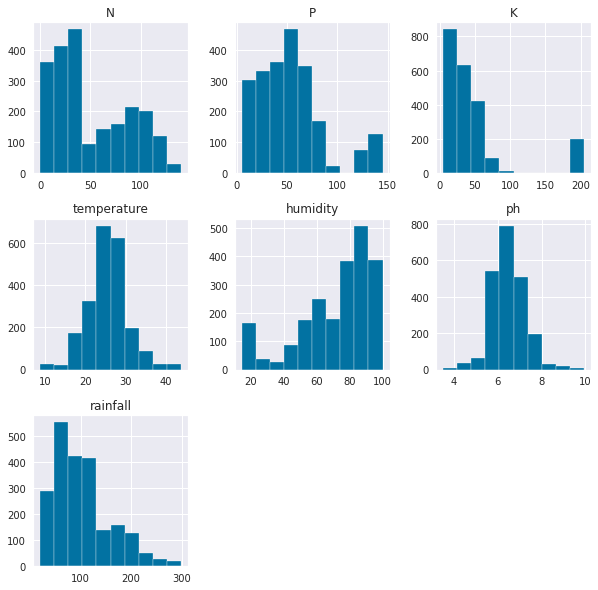

In [77]:
#Visualisation des distribution de nos variables numériques 
df.hist(figsize=(10,10))    #des histogrammes
plt.show()

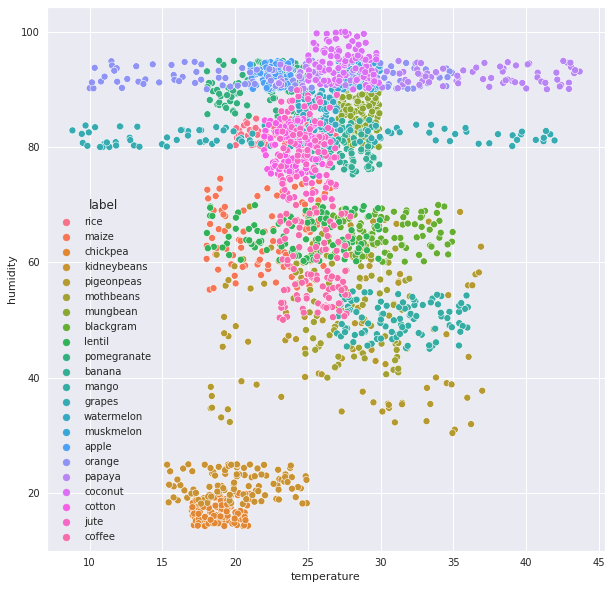

In [78]:
sns.scatterplot(x="temperature", y="humidity", data=df, hue="label")

In [79]:
# lets check the summary for all the crops

print("Average Ratio of Nitrogen in the Soil: {0:.2f}".format(df['N'].mean()))
print("Average Ratio of Phosphorous in the Soil: {0:.2f}".format(df['P'].mean()))
print("Average Ratio of Potassium in the Soil: {0:.2f}".format(df['K'].mean()))
print("Average Temperature in Celcius: {0:.2f}".format(df['temperature'].mean()))
print("Average Relative Humidity in %: {0:.2f}".format(df['humidity'].mean()))
print("Average PH Value of the Soil: {0:.2f}".format(df['ph'].mean()))
print("Average Rainfall in mm: {0:.2f}".format(df['rainfall'].mean()))

Average Ratio of Nitrogen in the Soil: 50.55
Average Ratio of Phosphorous in the Soil: 53.36
Average Ratio of Potassium in the Soil: 48.15
Average Temperature in Celcius: 25.62
Average Relative Humidity in %: 71.48
Average PH Value of the Soil: 6.47
Average Rainfall in mm: 103.46


In [80]:
#statistic summary of the data
df.describe(include='all')

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rice
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,NaN
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,NaN
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN


In [81]:
#checking the values of the target 'Label' and see if there is some repeted values.
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

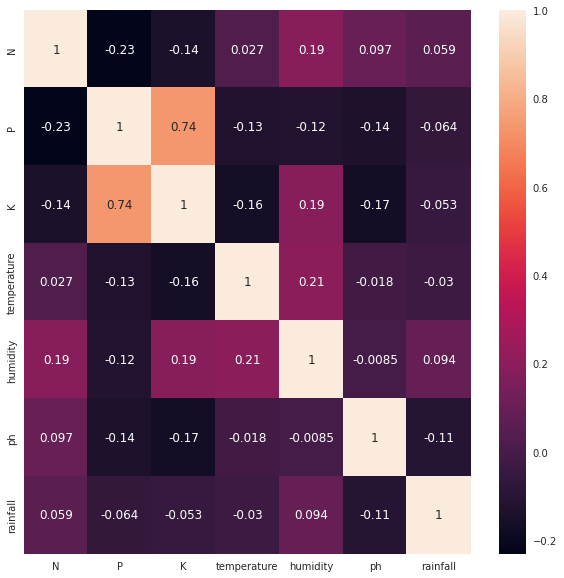

In [82]:
#matrice de correlation pour savoir les differentes relations entre les variables de notre dataset 
sns.heatmap(df.corr(),annot=True)

# Modeling 


In [83]:
# Splitting the data into train and test data
X = df.drop('label', axis=1)   # X contient les variables independantes 
y = df['label']                # y contient notre variable cible 'Label'
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.3,random_state =3) #80% pour train et 20% pour le test

In [84]:
print('the shape of our training data is: ',X_train.shape)
print('the shape of our testing data is: ',X_test.shape)

the shape of our training data is:  (1540, 7)
the shape of our testing data is:  (660, 7)


In [85]:
#creating two list to stock the name of the model and it's accuracy
accuracy_test = []
accuracy_train = []
model = []

#Decision Tree



In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5) #initialize the model

DecisionTree.fit(X_train,Y_train)   #fit our model

ypred1 = DecisionTree.predict(X_test)   #predict the values of X_test and stock them in ypred
score_test = metrics.accuracy_score(Y_test, ypred1)  #the accuracy of the model 
score_train = metrics.accuracy_score(Y_train, DecisionTree.predict(X_train))
print("DecisionTrees's Accuracy on X_test is: ", score_test)
print("DecisionTrees's Accuracy on X_train is: ", score_train)
cr1 = classification_report(Y_test,ypred1, output_dict=True)  

DecisionTrees's Accuracy on X_test is:  0.8878787878787879
DecisionTrees's Accuracy on X_train is:  0.912987012987013


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
accuracy_test.append(score_test)
accuracy_train.append(score_train)
model.append('Decision Tree')

In [88]:
report1 = pd.DataFrame(cr1).transpose()   #converting the classification report to a dataframe so that we can save it later in excel
report1

,precision,recall,f1-score,support
apple,1.000000,1.000000,1.000000,28.000000
banana,1.000000,1.000000,1.000000,24.000000
blackgram,0.705882,0.960000,0.813559,25.000000
chickpea,1.000000,0.972973,0.986301,37.000000
coconut,0.925000,1.000000,0.961039,37.000000
coffee,1.000000,0.878788,0.935484,33.000000
cotton,1.000000,1.000000,1.000000,28.000000
grapes,1.000000,1.000000,1.000000,37.000000
jute,0.543478,1.000000,0.704225,25.000000
kidneybeans,0.000000,0.000000,0.000000,33.000000


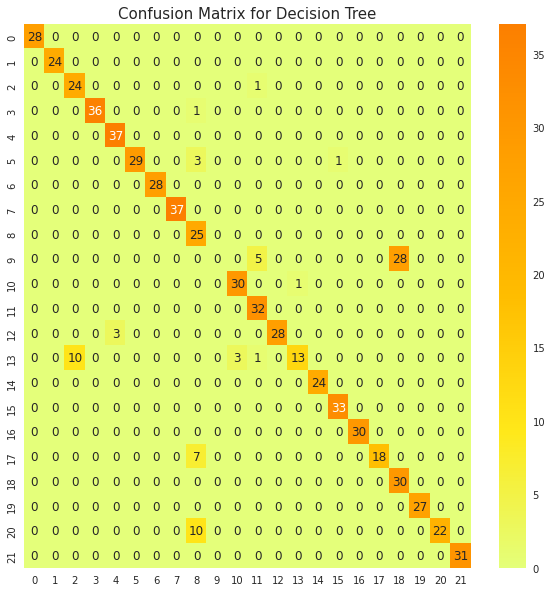

In [89]:
# lets evaluate the model performance

from sklearn.metrics import confusion_matrix

# lets print the confusion matrix first

plt.rcParams['figure.figsize'] = (10, 10)
cm1 = confusion_matrix(Y_test, ypred1)
sns.heatmap(cm1, annot = True, cmap = 'Wistia')
plt.title("Confusion Matrix for Decision Tree", fontsize = 15)
plt.show()

In [90]:
cm1 = pd.DataFrame(cm1)  #converting the confusion matrix to a dataframe so that we can save it later in excel

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


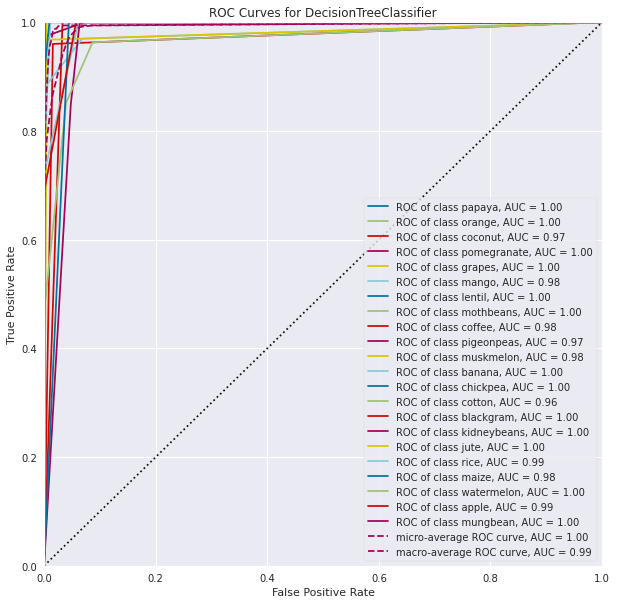

In [91]:
# Classification: ROC Curve and AUC  
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(DecisionTree, classes=Y_test.unique())

visualizer.fit(X_train, Y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)        # Evaluate the model on the test data
visualizer.show()  

In [92]:
from sklearn.model_selection import cross_val_score
scores_DT = cross_val_score(DecisionTree, X, y, cv=5)
scores_DT

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

# Support vector machine

In [93]:
from sklearn.svm import SVC

SVM = SVC(kernel='linear', C=1, random_state=42)

SVM.fit(X_train,Y_train)

ypred2 = SVM.predict(X_test)
score_train = metrics.accuracy_score(Y_train, SVM.predict(X_train))
score_test = metrics.accuracy_score(Y_test, ypred2)
print("SVM's Accuracy on X_test is: ", score_test)
print("SVM's Accuracy on X_train is: ", score_train)
accuracy_train.append(score_train)
accuracy_test.append(score_test)
model.append('SVM')

cr2 = classification_report(Y_test,ypred2, output_dict=True)

SVM's Accuracy on X_test is:  0.9833333333333333
SVM's Accuracy on X_train is:  0.9922077922077922


In [94]:
report2 = pd.DataFrame(cr2).transpose()
report2

,precision,recall,f1-score,support
apple,1.000000,1.000000,1.000000,28.000000
banana,1.000000,1.000000,1.000000,24.000000
blackgram,1.000000,1.000000,1.000000,25.000000
chickpea,1.000000,1.000000,1.000000,37.000000
coconut,1.000000,1.000000,1.000000,37.000000
coffee,1.000000,1.000000,1.000000,33.000000
cotton,0.964286,0.964286,0.964286,28.000000
grapes,1.000000,1.000000,1.000000,37.000000
jute,0.814815,0.880000,0.846154,25.000000
kidneybeans,1.000000,1.000000,1.000000,33.000000


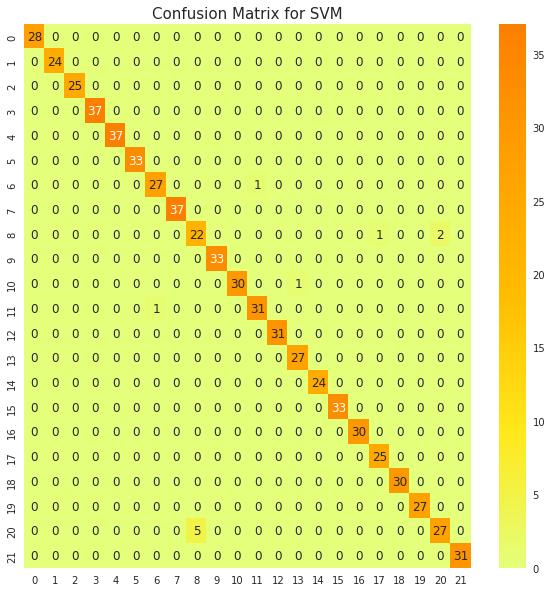

In [95]:

# lets evaluate the model performance

from sklearn.metrics import confusion_matrix

# lets print the confusion matrix first

plt.rcParams['figure.figsize'] = (10, 10)
cm2 = confusion_matrix(Y_test, ypred2)
sns.heatmap(cm2, annot = True, cmap = 'Wistia')
plt.title("Confusion Matrix for SVM", fontsize = 15)
plt.show()

In [96]:
cm2 = pd.DataFrame(cm2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


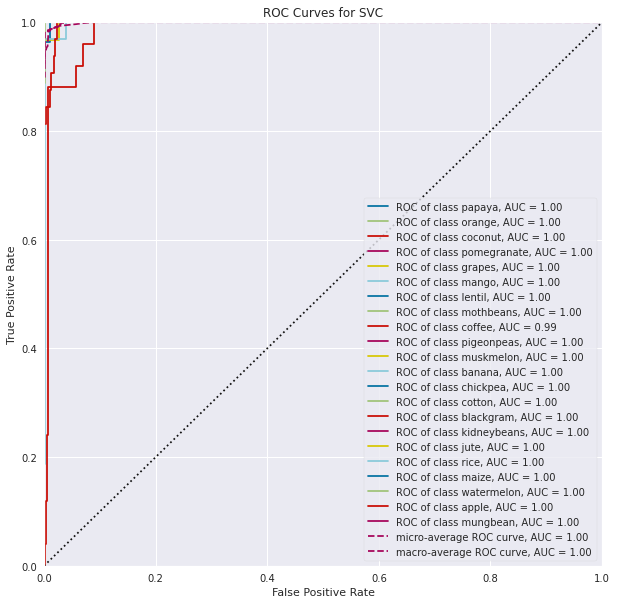

In [97]:
# Classification: ROC Curve and AUC  
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(SVM, classes=Y_test.unique())

visualizer.fit(X_train, Y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)        # Evaluate the model on the test data
visualizer.show()    

In [98]:
# Cross validation score (SVM)
score_SVM = cross_val_score(SVM,X,y,cv=5)
score_SVM

array([0.98181818, 0.98863636, 0.98863636, 0.98181818, 0.98409091])

In [99]:
score_SVM.mean()

0.985

# Logistic Regression


In [100]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=2)

LR.fit(X_train,Y_train)

ypred3 = LR.predict(X_test)

test_score = metrics.accuracy_score(Y_test, ypred3)
train_score = metrics.accuracy_score(Y_train, LR.predict(X_train))
cr3 = classification_report(Y_test,ypred3, output_dict=True)
print("Logistic Regression's Accuracy on X_test is: ", test_score)
print("Logistic Regression's Accuracy on X_train is: ", train_score)

Logistic Regression's Accuracy on X_test is:  0.953030303030303
Logistic Regression's Accuracy on X_train is:  0.9733766233766233


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [101]:
accuracy_test.append(test_score) 
accuracy_train.append(train_score)
model.append('Logistic Regression')

In [102]:
report3 = pd.DataFrame(cr3).transpose()
report3

,precision,recall,f1-score,support
apple,1.000000,1.000000,1.000000,28.00000
banana,0.960000,1.000000,0.979592,24.00000
blackgram,0.750000,0.960000,0.842105,25.00000
chickpea,1.000000,1.000000,1.000000,37.00000
coconut,1.000000,0.972973,0.986301,37.00000
coffee,0.970588,1.000000,0.985075,33.00000
cotton,0.896552,0.928571,0.912281,28.00000
grapes,1.000000,1.000000,1.000000,37.00000
jute,0.777778,0.840000,0.807692,25.00000
kidneybeans,1.000000,1.000000,1.000000,33.00000


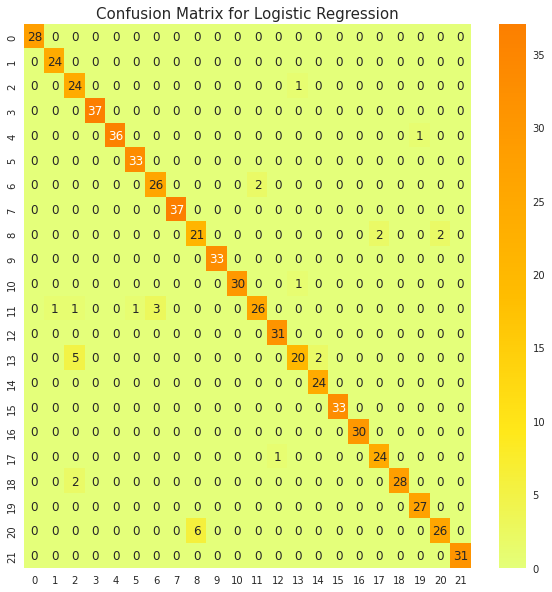

In [103]:
# lets evaluate the model performance

from sklearn.metrics import confusion_matrix

# lets print the confusion matrix first

plt.rcParams['figure.figsize'] = (10, 10)
cm3 = confusion_matrix(Y_test, ypred3)
sns.heatmap(cm3, annot = True, cmap = 'Wistia')
plt.title("Confusion Matrix for Logistic Regression", fontsize = 15)
plt.show()

In [104]:
cm3 = pd.DataFrame(cm3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


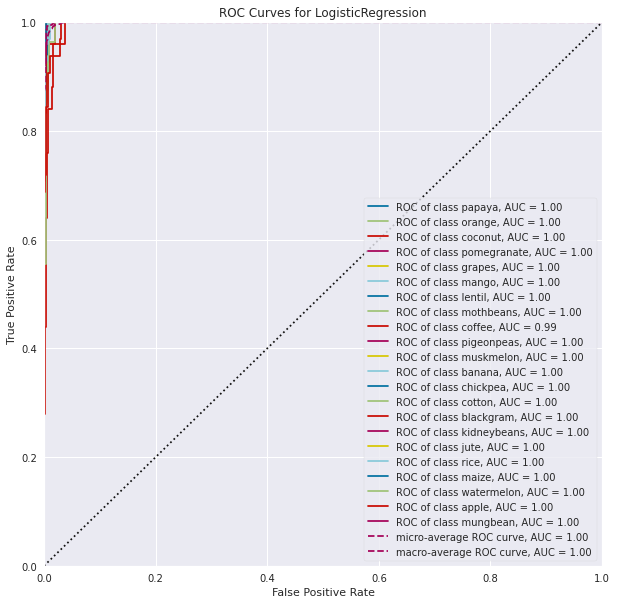

In [105]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(LR, classes=Y_test.unique())

visualizer.fit(X_train, Y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)        # Evaluate the model on the test data
visualizer.show()     

In [106]:
# Cross validation score (SVM)
score_LR = cross_val_score(LR,X,y,cv=5)
score_LR

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.95      , 0.96590909, 0.94772727, 0.96818182, 0.94318182])

In [107]:
print('Cross validation scores for DecisionTree ',scores_DT)
print('DT scores mean',scores_DT.mean() )
print('Cross validation scores for SVM ',score_SVM)
print('SVM scores mean',score_SVM.mean() )
print('Cross validation scores for LogisticRegression ',score_LR)
print('LR scores mean',score_LR.mean() )

Cross validation scores for DecisionTree  [0.93636364 0.90909091 0.91818182 0.87045455 0.93636364]
DT scores mean 0.9140909090909091
Cross validation scores for SVM  [0.98181818 0.98863636 0.98863636 0.98181818 0.98409091]
SVM scores mean 0.985
Cross validation scores for LogisticRegression  [0.95       0.96590909 0.94772727 0.96818182 0.94318182]
LR scores mean 0.9550000000000001


#Compare The accuracy of the three models

 **On the testing data**

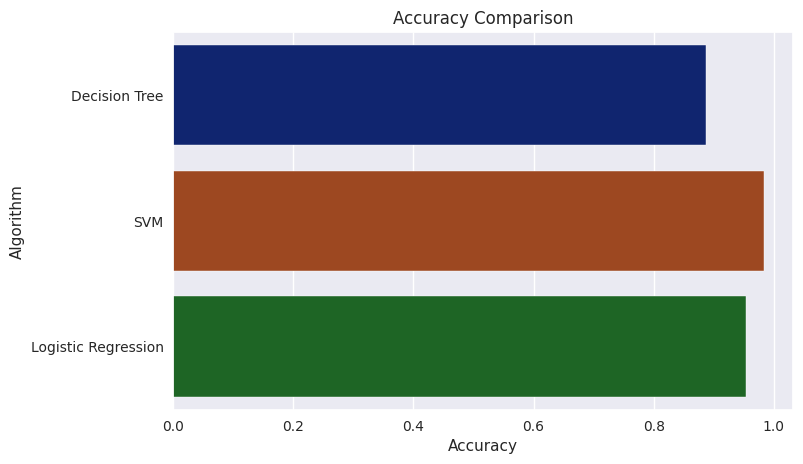

In [108]:
plt.figure(figsize=[8,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = accuracy_test,y = model,palette='dark')

**On the training data**

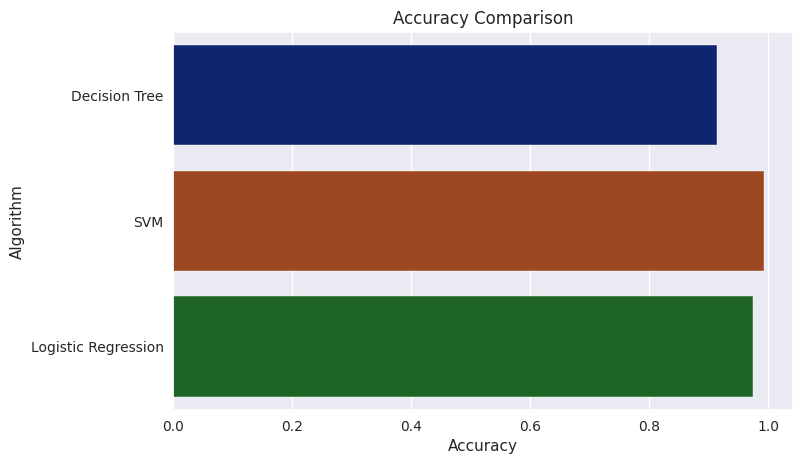

In [110]:
plt.figure(figsize=[8,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = accuracy_train,y = model,palette='dark')

**compare Cross validation scores** 

No handles with labels found to put in legend.


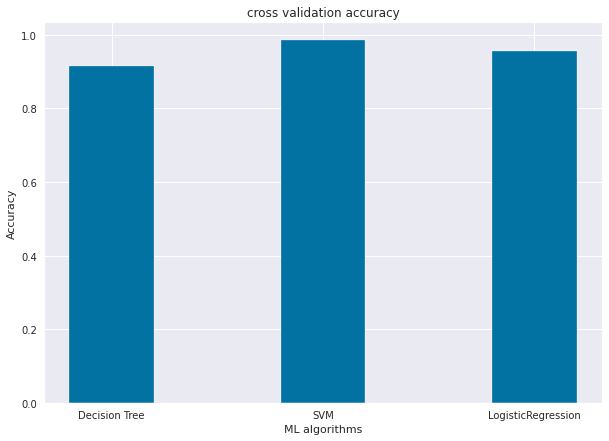

In [111]:
label = ['Decision Tree','SVM','LogisticRegression']
Test = [scores_DT.mean(), score_SVM.mean(), score_LR.mean()]

f, ax = plt.subplots(figsize=(10,7)) # set the size that you'd like (width, height)
X_axis = np.arange(len(label))
plt.bar(X_axis,Test, 0.4)

plt.xticks(X_axis, label)
plt.xlabel("ML algorithms")
plt.ylabel("Accuracy")
plt.title("cross validation accuracy")
plt.legend()
#plt.savefig('train vs test.png')
plt.show()

**on remarque que le modele SVM a le meilleur accuracy**




lets merge the test data set and the predictions of different models 

In [112]:
ypred1 =pd.DataFrame(ypred1)
ypred2 =pd.DataFrame(ypred2)
ypred3 =pd.DataFrame(ypred3)

In [113]:
#change the column name
ypred1.rename(columns = {0:'ypred1'}, inplace = True)
ypred2.rename(columns = {0:'ypred2'}, inplace = True)
ypred3.rename(columns = {0:'ypred3'}, inplace = True)

In [114]:
 #concatiner les differentes datasets
 result = pd.concat([X_test.reset_index(), Y_test.reset_index(), ypred1, ypred2, ypred3], axis=1)

In [115]:
result.drop('index',axis=1,inplace=True)

In [116]:
result

,N,P,K,temperature,humidity,ph,rainfall,label,ypred1,ypred2,ypred3
0,31,68,45,42.923253,90.076005,6.938313,196.240824,papaya,papaya,papaya,papaya
1,0,23,15,22.566642,93.374889,7.598729,109.858575,orange,orange,orange,orange
2,23,7,34,26.105512,91.524212,5.852038,134.127967,coconut,coconut,coconut,coconut
3,26,10,33,28.272981,96.936495,6.070718,198.823486,coconut,coconut,coconut,coconut
4,8,28,37,23.884048,86.206138,6.082572,108.312179,pomegranate,pomegranate,pomegranate,pomegranate
...,...,...,...,...,...,...,...,...,...,...,...
655,40,58,15,29.464160,87.608900,6.978400,43.154115,mungbean,mungbean,mungbean,mungbean
656,120,23,55,27.844928,91.606666,6.732049,26.478444,muskmelon,muskmelon,muskmelon,muskmelon
657,24,67,22,20.120043,22.898456,5.618844,104.625215,kidneybeans,pigeonpeas,kidneybeans,kidneybeans
658,99,16,30,23.526521,65.443409,6.392792,186.172820,coffee,coffee,coffee,coffee


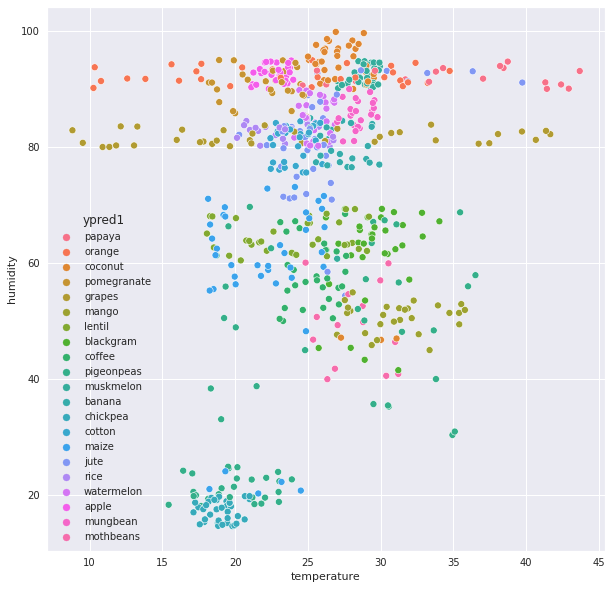

In [117]:
#pour ypred1 (DecisionTree)
sns.scatterplot(x="temperature", y="humidity", data=result, hue="ypred1")

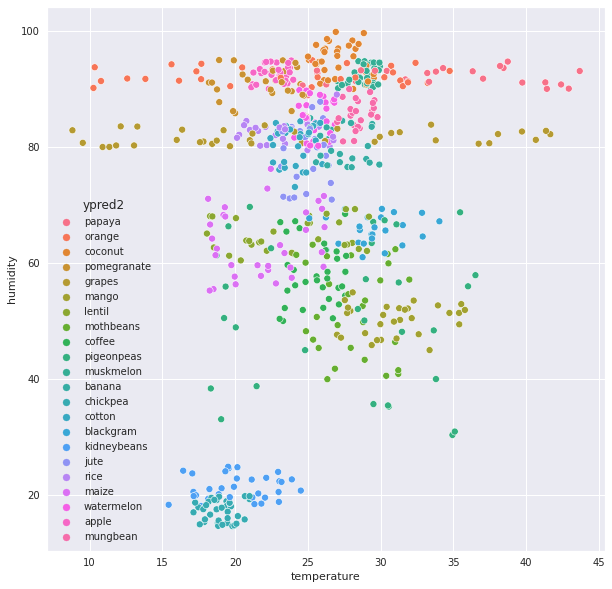

In [118]:
#pour ypred2 (SVM)
sns.scatterplot(x="temperature", y="humidity", data=result, hue="ypred2")

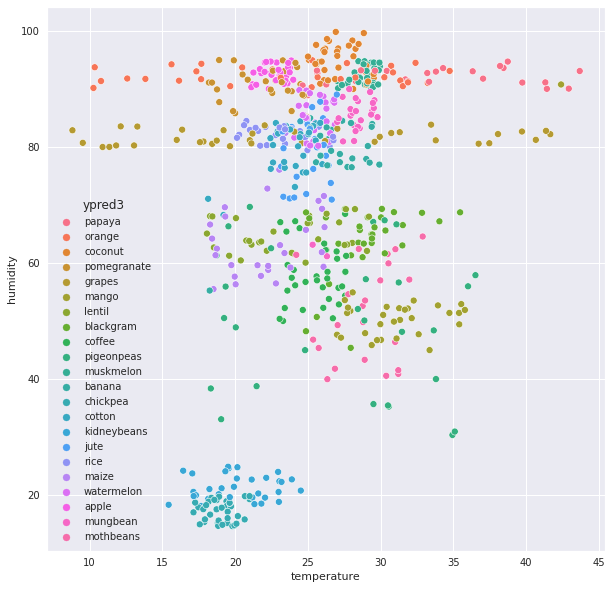

In [119]:
#pour ypred3 (Logistic Regression)
sns.scatterplot(x="temperature", y="humidity", data=result, hue="ypred3")

combiner toutes les matrices de confusions, ainsi les differentes classification_report dans un seul fichier excel

In [120]:
with pd.ExcelWriter('output.xlsx') as writer:  
    result.to_excel(writer, sheet_name='result')
    cm1.to_excel(writer, sheet_name='cm_Decision_Tree')
    cm2.to_excel(writer, sheet_name='cm_SVM')
    cm3.to_excel(writer, sheet_name='cm_LR')
    report1.to_excel(writer, sheet_name='Report_DT')
    report2.to_excel(writer, sheet_name='report_SVM')
    report3.to_excel(writer, sheet_name='report_LR')

#Feature Importance


*   Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.
*  The purpose of feature importance is to help you determine whether the predictions are sensible. Is the relationship between the dependent variable and the important features supported by your domain knowledge?




Feature[0]:N, Score: 0.145276
Feature[1]:P, Score: 0.156501
Feature[2]:K, Score: 0.280450
Feature[3]:temperature, Score: 0.066652
Feature[4]:humidity, Score: 0.202715
Feature[5]:ph, Score: 0.000000
Feature[6]:rainfall, Score: 0.148406


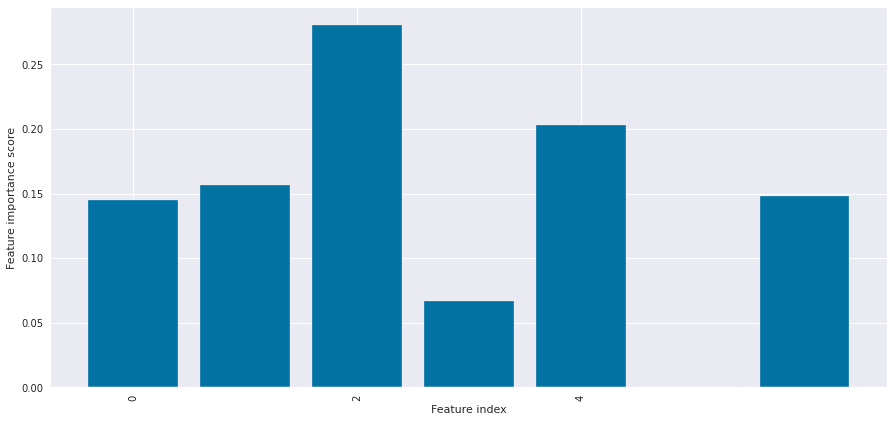

In [121]:
#Feature importance of Decision Tree
importance = DecisionTree.feature_importances_

for i,v in enumerate(importance):
    print('Feature[%0d]:%s, Score: %.6f' % (i,df.columns[i],v))
    
plt.subplots(figsize=(15,7))
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Feature index')
plt.ylabel('Feature importance score')
plt.xticks(rotation=90)
plt.xticks(np.arange(0,len(df.columns)-2, 2.0))
plt.show()

Text(0.5, 0, 'Feature Importance')

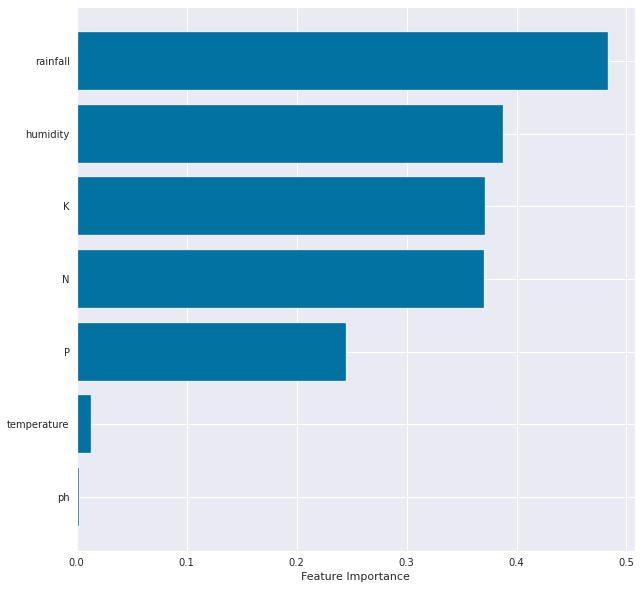

In [122]:
#Feature importance of Support vector machine
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(SVM, X_test, Y_test)

feature_names = X_test.columns.to_list()
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")

Feature : 0 has score  : -0.6607945110335341 
Feature : 1 has score  : -0.3204974080461381 
Feature : 2 has score  : -0.2909819022278704 
Feature : 3 has score  : -0.2675498737756368 
Feature : 4 has score  : -0.08190808760163172 
Feature : 5 has score  : 0.3955782278599229 
Feature : 6 has score  : 1.2137703974539211 


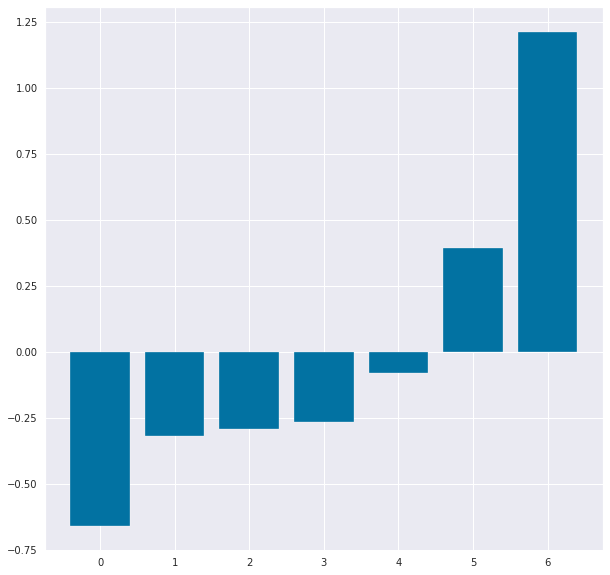

In [123]:
#Feature importance of Logistic Regression
importance=LR.coef_[0]
importance=np.sort(importance)
for index,val in enumerate(importance):
    print("Feature : {} has score  : {} ".format(index,val))
#plotting the features and their score in ascending order
sns.set_style("darkgrid")
plt.bar([i for i in range (len(importance))],importance)
plt.show()